In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(image, cmap=None):
    fig = plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)

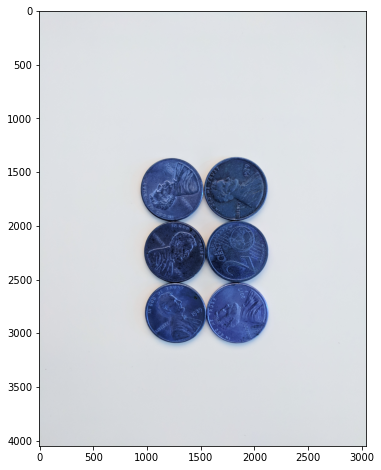

In [3]:
pennies = cv2.imread('pennies.jpg')
display(pennies)

# Default Contouring

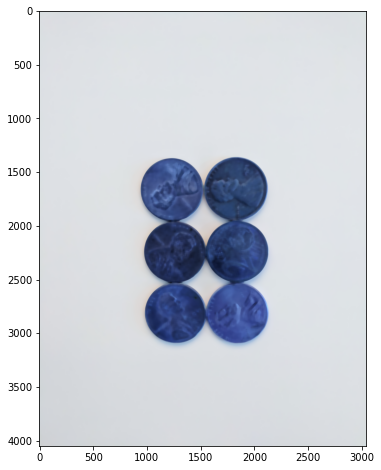

In [4]:
blurred_img = cv2.medianBlur(pennies, 25)
display(blurred_img)

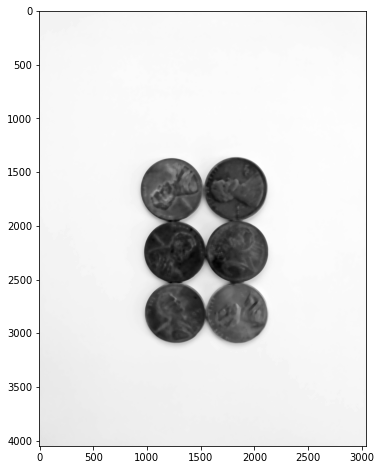

In [5]:
gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)
display(gray_img, 'gray')

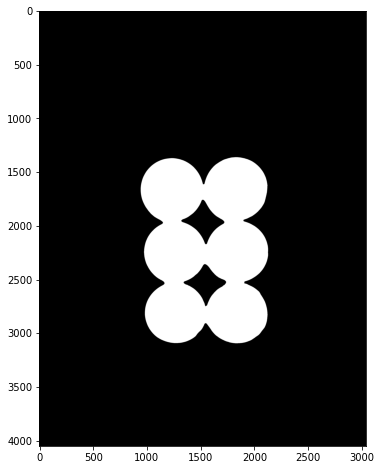

In [6]:
success, thresh_img = cv2.threshold(gray_img, 160, 255, cv2.THRESH_BINARY_INV)
display(thresh_img, 'gray')

In [7]:
contours, hierarchy = cv2.findContours(thresh_img.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
len(contours)

3

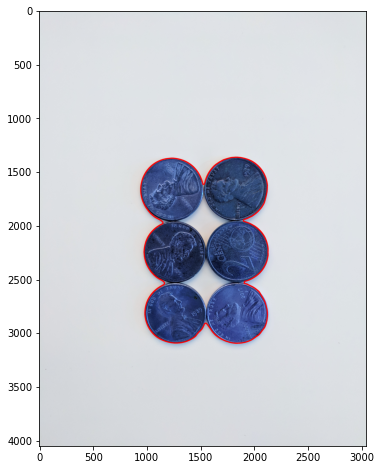

In [11]:
for i in range(len(contours)):
    if hierarchy[0][i][-1] == -1:
        cv2.drawContours(pennies, contours, i, (255, 0, 0), 10)
        
display(pennies)

# Watershed Algorithm

In [12]:
pennies = cv2.imread('pennies.jpg')

In [21]:
blurred_img = cv2.medianBlur(pennies, 35)

In [22]:
gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)

In [23]:
success, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

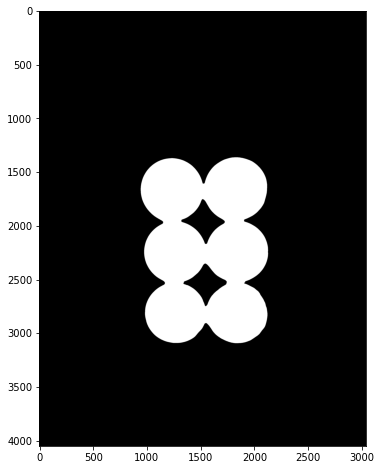

In [24]:
display(thresh_img, cmap='gray')

In [25]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, 
                           kernel, iterations=2)

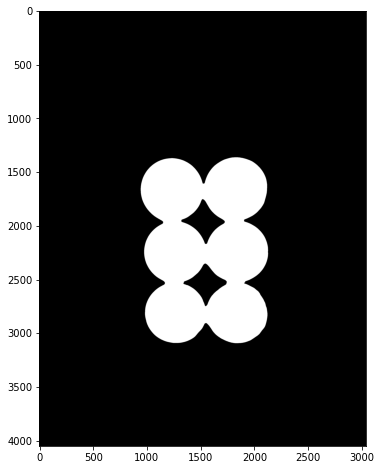

In [26]:
display(opening, cmap='gray')

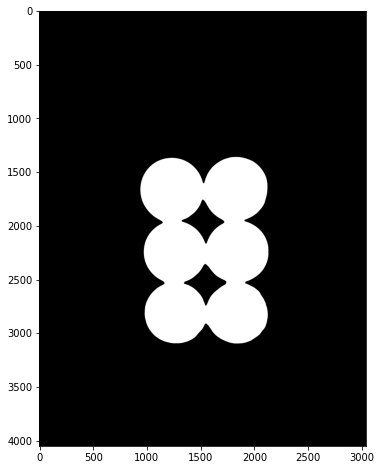

In [28]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg, 'gray')

In [29]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

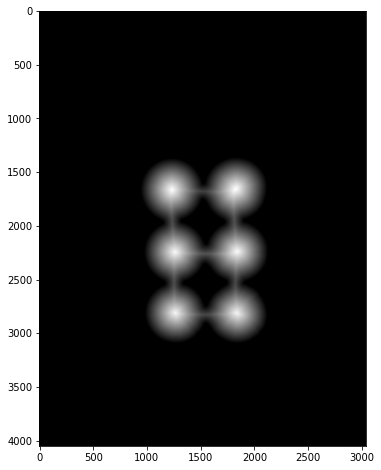

In [31]:
display(dist_transform, 'gray')

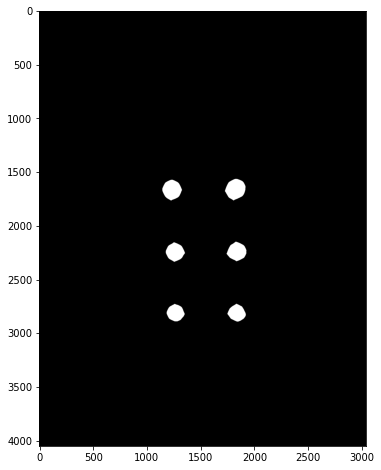

In [30]:
display(sure_fg, 'gray')

In [33]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

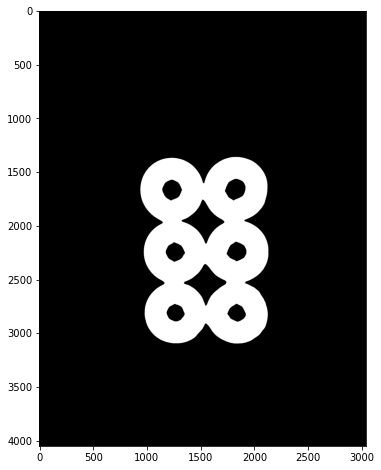

In [35]:
display(unknown, 'gray')

In [36]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

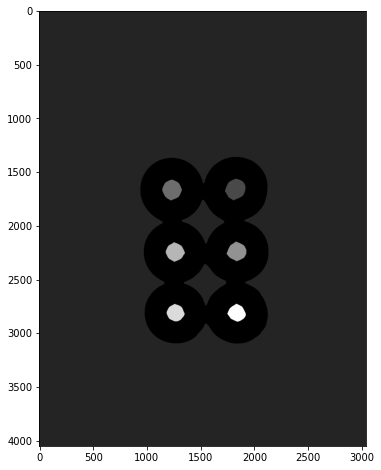

In [38]:
display(markers, 'gray')

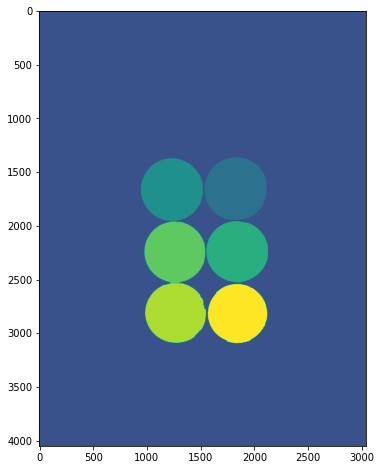

In [39]:
markers = cv2.watershed(pennies, markers)
display(markers)

In [40]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
len(contours)

11

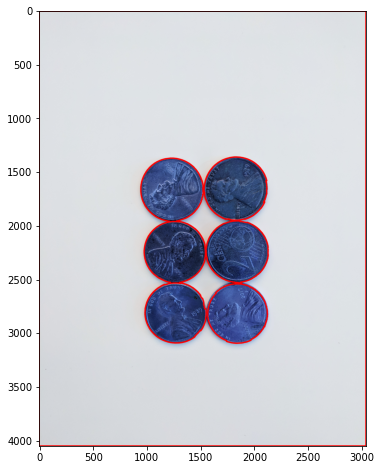

In [42]:
for i in range(len(contours)):
    if hierarchy[0][i][-1] == -1:
        cv2.drawContours(pennies, contours, i, (255, 0, 0), 10)
        
display(pennies)